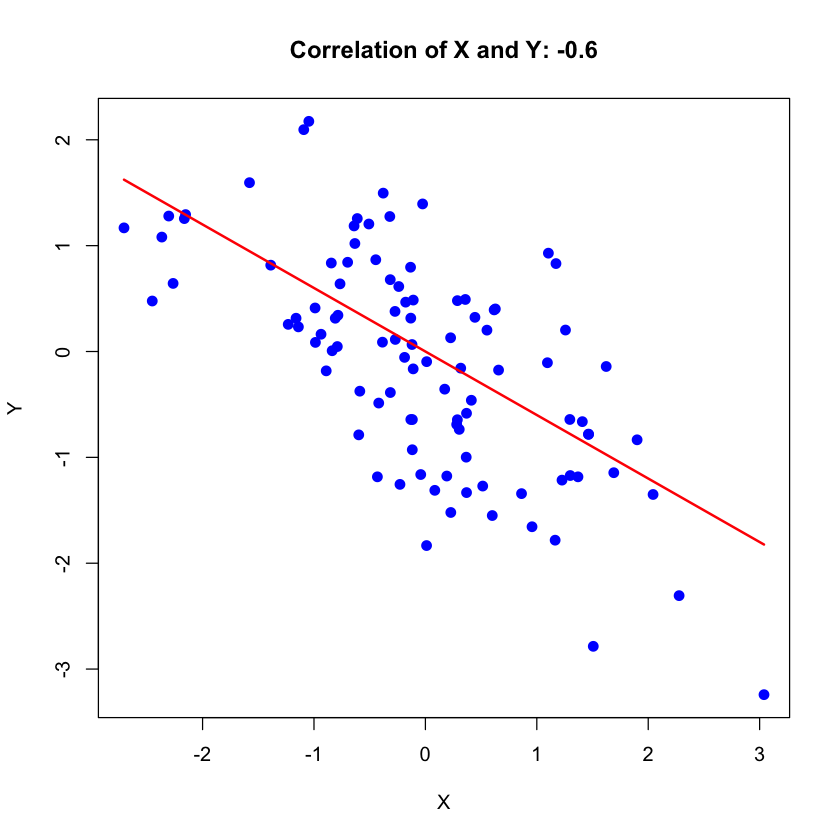

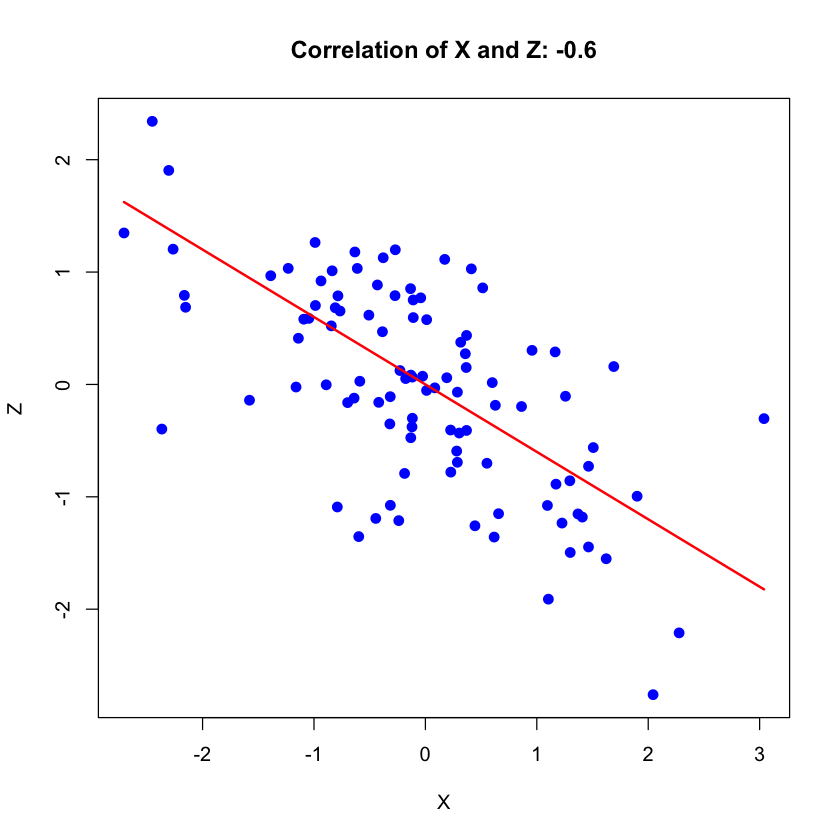

In [28]:
# Slide 9:

set.seed(4197)
rho=-0.6
X<-rnorm(100)
W1<-rnorm(100)
W2<-rnorm(100)
W3<-rnorm(100)
Y<-rho*X+sqrt(1-rho^2)*W1
Z<-rho*X+sqrt(1-rho^2)*W2

plot(X,Y,main="Correlation of X and Y: -0.6",cex=1.2,pch=16,col="blue")
lines(sort(X),rho*sort(X),type="l",lwd=2,col="red")


plot(X,Z,main="Correlation of X and Z: -0.6",cex=1.2,pch=16,col="blue")
lines(sort(X),rho*sort(X),type="l",lwd=2,col="red")

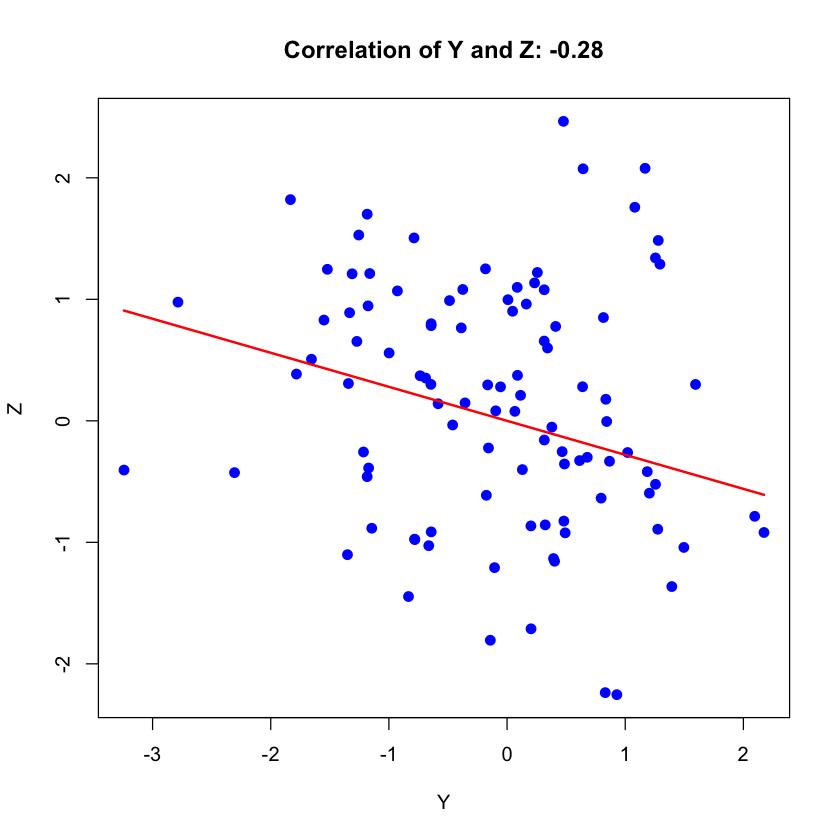

In [29]:
# Slide 12:

W2<--W1
Z<-rho*X+sqrt(1-rho^2)*W2
plot(Y,Z,main="Correlation of Y and Z: -0.28",cex=1.2,pch=16,col="blue")
lines(sort(Y),-0.28*sort(Y),type="l",lwd=2,col="red")

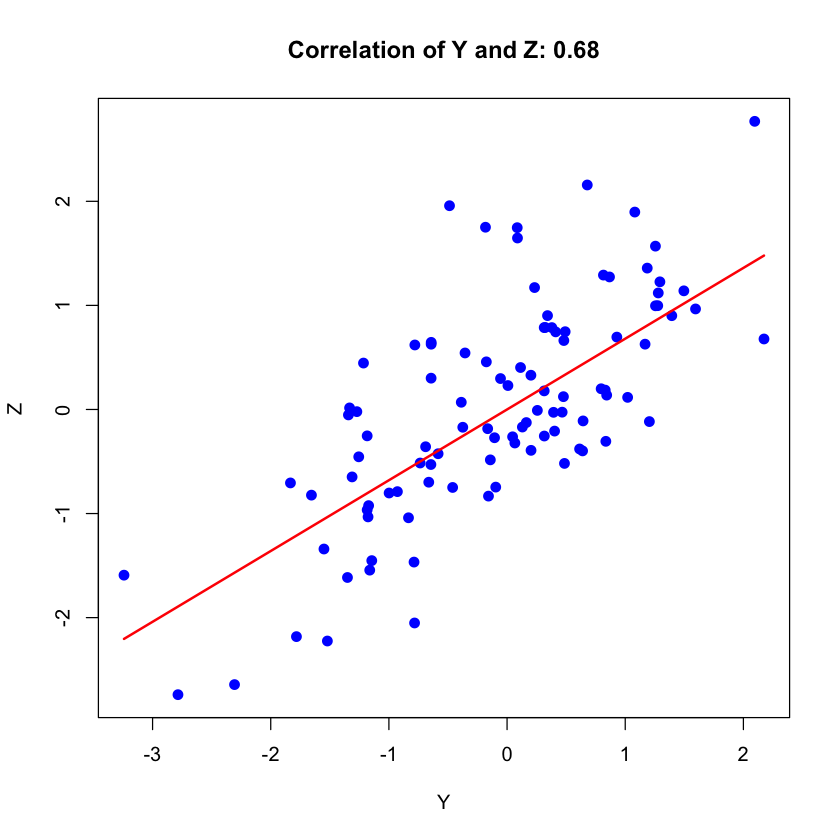

In [30]:
# Slide 13:

W2<- 0.5*W1+(sqrt(3)/2)*W3
Z<-rho*X+sqrt(1-rho^2)*W2
plot(Y,Z,main="Correlation of Y and Z: 0.68",cex=1.2,pch=16,col="blue")
lines(sort(Y),0.68*sort(Y),type="l",lwd=2,col="red")

In [31]:
# Slide 15:

heiwei<-read.table("../Data/heiwei.txt",header=T,sep="\t",dec=".")

summary(heiwei)
head(heiwei)

# converting to cm and kg:
heiwei[,2]<-2.54*heiwei[,2]
heiwei[,3]<-0.453592*heiwei[,3]
heiwei<-heiwei[,2:3]
names(heiwei)<-c("height","weight")
head(heiwei)

my.n<-length(heiwei[,1])
my.1<-rep(1,my.n)
X<-as.matrix(heiwei)

mu.heiwei<-colMeans(heiwei)
mu.heiwei
Sigma.heiwei<-(t(X)%*%X- my.n*mu.heiwei%*%t(mu.heiwei))/(my.n-1)
Sigma.heiwei

# Faster:
# Sigma.heiwei<-var(heiwei)
# Sigma.heiwei

     Index       Height.Inches.  Weight.Pounds.  
 Min.   :    1   Min.   :60.28   Min.   : 78.01  
 1st Qu.: 6251   1st Qu.:66.70   1st Qu.:119.31  
 Median :12500   Median :68.00   Median :127.16  
 Mean   :12500   Mean   :67.99   Mean   :127.08  
 3rd Qu.:18750   3rd Qu.:69.27   3rd Qu.:134.89  
 Max.   :25000   Max.   :75.15   Max.   :170.92  

,Index,Height.Inches.,Weight.Pounds.
,<dbl>,<dbl>,<dbl>
1,1,65.78331,112.9925
2,2,71.51521,136.4873
3,3,69.39874,153.0269
4,4,68.21660,142.3354
5,5,67.78781,144.2971
6,6,68.69784,123.3024


,height,weight
,<dbl>,<dbl>
1,167.0896,51.25249
2,181.6486,61.90955
3,176.2728,69.41178
4,173.2702,64.56220
5,172.1810,65.45201
6,174.4925,55.92898


height    weight 
172.70251  57.64221

,height,weight
height,23.33145,12.84736
weight,12.84736,27.97659


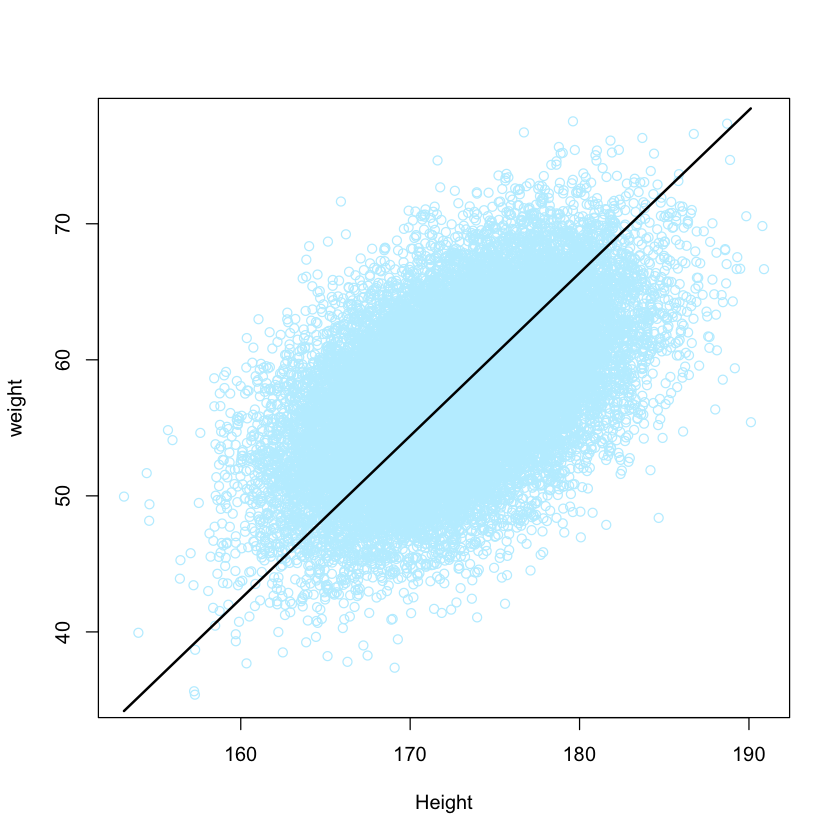

In [32]:
# Slide 16:

plot(heiwei$height,heiwei$weight,xlab='Height',ylab='weight',col="lightblue1")

# major axis of contour ellipse:
pc1<-eigen(Sigma.heiwei)$vectors[,1]
with(heiwei,lines(min(height):max(height),
                  mu.heiwei[2]+(pc1[2]/pc1[1])*((min(height):max(height))-mu.heiwei[1]),
                  type="l",lwd=2))

Got an error in this code

In [33]:
# # slide 23:
# # conditional mean:

# my.height<-min(heiwei$height):max(heiwei$height)
# my.weight<-(round(100*min(heiwei$weight),digits=2):round(100*max(heiwei$weight),digits=2))/100


# lines(my.height,mu.heiwei[2]+(Sigma.heiwei[1,2]/Sigma.heiwei[2,2])*(my.height-mu.heiwei[1]),
#       type="l",lwd=2,col="green")
# lines(mu.heiwei[1]+(Sigma.heiwei[2,1]/Sigma.heiwei[1,1])*(my.weight-mu.heiwei[2]),my.weight,
#       type="l",lwd=2,col="blue")

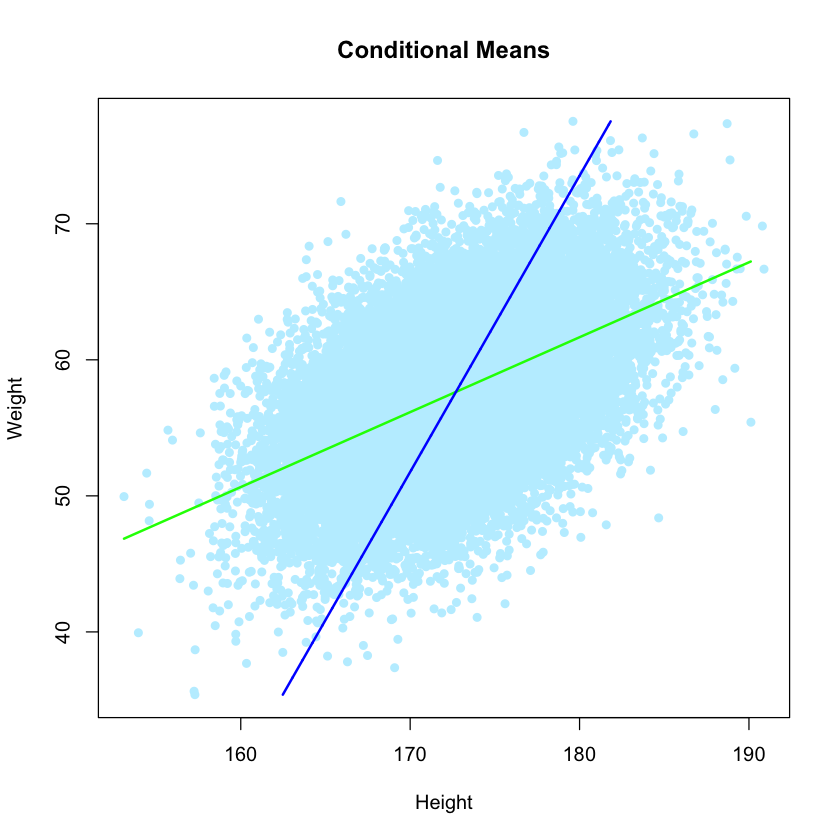

In [34]:
# slide 23:
# conditional mean:

my.height <- min(heiwei$height):max(heiwei$height)
my.weight <- (round(100*min(heiwei$weight),digits=2):round(100*max(heiwei$weight),digits=2))/100

# make sure a plot exists before adding lines
plot(heiwei$height, heiwei$weight,
     xlab="Height", ylab="Weight", main="Conditional Means",
     col="lightblue1", pch=16)

lines(my.height,
      mu.heiwei[2] + (Sigma.heiwei[1,2]/Sigma.heiwei[1,1]) * (my.height - mu.heiwei[1]),
      type="l", lwd=2, col="green")

lines(mu.heiwei[1] + (Sigma.heiwei[1,2]/Sigma.heiwei[2,2]) * (my.weight - mu.heiwei[2]),
      my.weight,
      type="l", lwd=2, col="blue")

In [35]:
# Slide 24: 

#slope and intercept given height: 
alpha_1<-mu.heiwei[2]-(Sigma.heiwei[2,1]/Sigma.heiwei[1,1])*mu.heiwei[1]
beta_1<-(Sigma.heiwei[2,1]/Sigma.heiwei[1,1])

alpha_1;beta_1

#slope and intercept given weight:

alpha_2<-mu.heiwei[1]-(Sigma.heiwei[1,2]/Sigma.heiwei[2,2])*mu.heiwei[2]
beta_2<-(Sigma.heiwei[1,2]/Sigma.heiwei[2,2])

alpha_2;beta_2

# given 180cm:
alpha_1+beta_1*180

# given 65 kg:
alpha_2+beta_2*65

weight 
-37.4557

[1] 0.5506458

height 
146.2321

[1] 0.4592184

weight 
61.66054

height 
176.0813

In [36]:
# Slide 31:

Sigma <- matrix(c(1, 0.5, 0.7,
                    0.5, 1, 0.7,
                    0.7, 0.7, 1),ncol=3)
Sigma.11<-Sigma[1:2,1:2]
Sigma.12<-Sigma[1:2,3]
Sigma.21<-Sigma[3,1:2]
Sigma.22<-Sigma[3,3]
(Sigma1.2<-Sigma.11-Sigma.12%*%solve(Sigma.22)%*%Sigma.21)

0.51,0.01
0.01,0.51


In [37]:
# Slide  40:

my.corr<-diag(rep(1,5))
my.corr[lower.tri(my.corr)]<-c(-0.309,     
                                0.091,0.192,
                                0.158,0.120,0.745,
                                0.344,-0.166,0.320,0.464)
my.corr<-my.corr+t(my.corr)-diag(rep(1,5))

colnames(my.corr)<-c("C3A","C3S","Blaine","Strgth3","Strgth28")
row.names(my.corr)<-colnames(my.corr)

#principal components and values:
eigen(my.corr)

#partial covariance:

Sigma.11<-my.corr[-3,-3]
Sigma.12<-my.corr[-3,3]
Sigma.21<-my.corr[3,-3]
Sigma.22<-my.corr[3,3]
Sigma.1.2<-Sigma.11-Sigma.12%*%solve(Sigma.22)%*%Sigma.21

# partial correlation:
cov2cor(Sigma.1.2)

eigen() decomposition
$values
[1] 2.0704469 1.2903890 1.0941118 0.4958311 0.0492212

$vectors
           [,1]       [,2]        [,3]       [,4]       [,5]
[1,] 0.02237628 -0.6488360  0.60415797 -0.3204363 -0.3329038
[2,] 0.59652632  0.3282360 -0.19519336 -0.3603886 -0.6069902
[3,] 0.12228096 -0.5578375 -0.66628257 -0.3972132  0.2686147
[4,] 0.61640451  0.1242899  0.37857867 -0.1762646  0.6559013
[5,] 0.49874693 -0.3803188 -0.09817555  0.7606531 -0.1355641


,C3A,C3S,Strgth3,Strgth28
C3A,1.0000000,-0.3235912,0.2108949,0.1365997
C3S,-0.3235912,1.0000000,0.7813280,0.3249089
Strgth3,0.2108949,0.7813280,1.0000000,0.5535000
Strgth28,0.1365997,0.3249089,0.5535000,1.0000000
